<a href="https://colab.research.google.com/github/gencross/CollatzGroup3/blob/main/MilesCollatzNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
def collatz_verbose(n):
  '''
  Prints the orbit of n
  '''
  while abs(n) != 1: #check if n has reached 1 or -1
    print(n)
    if n % 2 == 0: #if n is even, divide by 2 and repeat
      n //= 2
    else: #if n is odd, do 3n+1 and repeat
      n = (3 * n + 1)
  return

In [4]:
def collatz_iterations(n):
  '''
  Return how many iterations it takes for
  n to go to 1
  '''
  iterations = 0
  while n != 1:
    if n % 2 == 0:
      n //= 2
    else:
      n = (3 * n + 1) // 2
    iterations += 1
  return iterations

In [5]:
def collatz_check(n):
  '''
  Returns True if n passes
  the Collatz conjecture
  '''
  while n != 1:
    if n % 2 == 0:
      n //= 2
    else:
      n = (3 * n + 1) // 2
  return True

In [6]:
for i in range(2,10**5):
  if collatz_check(i) != True:
    print("Fields Medal!!!", i)
print("Check complete.")    

Check complete.


In [7]:
def find_max_iter(n):
  '''
  Checks for the number with the longest orbit
  up to n. Returns a tuple. The first value is
  the number, the second value is the number of 
  iterations.
  '''
  max_iter = 0
  max_iter_n = 0
  for i in range(2,n+1):
    i_iter = collatz_iterations(i)
    if i_iter > max_iter:
      max_iter = i_iter
      max_iter_n = i
  return max_iter_n, max_iter

In [8]:
find_max_iter(10**5)

(77031, 221)

In [9]:
#collatz_verbose(77031)

In [10]:
def better_check(n):
  for i in range(3,n+1,2):
    c = i
    while c >= i:
      if c % 2 == 0:
        c //= 2
      if c % 2 == 1:
        c = (3 * c + 1) // 2
  print("Verified up to {}".format(n))


In [11]:
#better_check(10**9)

The "dropping time", σ(n), of an integer n is defined as the number of 3n+1 iterations that n undergoes before it becomes less than where it started. For example, σ(5)=3, since 5 goes to 16 goes to 8 goes to 4, which is less than 5. Every number that we tested has a finite dropping time, since every number that we tested eventually reached 1. The dropping time is significant in testing new numbers if you're testing numbers sequentially. Once a number n drops below where it started, it will definitely reach 1 because all numbers less than n have already been shown to reach 1. Below, you can see the dropping time function that we created.

In [41]:
def sigma(n):
  '''
  Finds and returns the "dropping time" of n.
  This is the number of 3n+1 loops that it takes
  for n to become less than where it started.
  '''
  i = n # i will be the variable that changes, n will stay static
  loops = 0 # track the dropping time here
  while i >= n: # stop when i < n
    if i % 2 == 0:
      i //= 2
      loops += 1
    else:
      i = (3 * i + 1) // 2
      loops += 2 # We can combine 2 steps into one here since 3i+1 is always even
  return loops

At first glance, σ(n) doesn't depend on the size of n. See below, the dropping time of prime numbers ranging from 1 to 10 digits.

In [30]:
[sigma(7),
sigma(31),
sigma(127),
sigma(8191),
sigma(97259),
sigma(524287),
sigma(9375739),
sigma(86028121),
sigma(633910099),
sigma(2147483647)]

[11, 91, 24, 70, 8, 91, 21, 3, 6, 187]

The 10 digit number has the largest dropping time, but 31 is tied for second place. So, the following function was created to find which numbers have a bigger dropping time than any previous numbers.

In [33]:
def best_sigmas(n):
  '''
  Creates and returns a list all positive ints
  less than or equal to n whose dropping time
  is greater than the dropping times of all
  smaller positive ints. Also returns the dropping
  times. Output format is (n,sigma(n)).
  '''
  int_list = [(2,1)] #σ(1) is undefined, so we start checking at 2
  for i in range(3,n+1,2): # we only check odd numbers since σ(2n) = 1 for any n
    sig_i = sigma(i) # save this as a variable so we don't have to run it twice
    if sig_i > int_list[-1][1]:
      int_list.append((i,sig_i))
  return int_list

In [34]:
best_sigmas_list = best_sigmas(10**7)
print(best_sigmas_list)

[(2, 1), (3, 6), (7, 11), (27, 96), (703, 132), (10087, 171), (35655, 220), (270271, 267), (362343, 269), (381727, 282), (626331, 287), (1027431, 298), (1126015, 365), (8088063, 401)]


The output is formatted as `(n,σ(n))`. With this list, we can see that σ(n) only increases 13 times when n goes from 2 to 10 million. A logical next step would be finding what the most common dropping time is. A sensible guess is 1, since all even numbers have a dropping time of 1. Let's check.

In [52]:
from statistics import mean
from statistics import mode
sigma_list = []
for i in range(2,10**7): # we check up 10**7 because checking higher takes too long
  sigma_list.append(sigma(i))
print(mean(sigma_list), "is the mean.")
print(mode(sigma_list), "is the mode.")

5.235936047187209 is the mean.
1 is the mode.


As predicted, 1 is the mode. But, the mean is 5.236, a number that seems quite random. What happens when we only consider odd numbers?

In [53]:
from statistics import mean
from statistics import mode
sigma_list = []
for i in range(3,10**7,2): # only odd numbers this time
  sigma_list.append(sigma(i))
print(mean(sigma_list), "is the mean.")
print(mode(sigma_list), "is the mode.")

9.471872094374419 is the mean.
3 is the mode.


When we only look at odd numbers, the mode is 3. The mean is about twice as big, which makes sense. Odd numbers are of the form 2n+1, so what happens if we look at numbers of the form 4n+1?

In [54]:
from statistics import mean
from statistics import mode
sigma_list = []
for i in range(5,10**7,4): # we start with 4 because σ(1) is undefined
  sigma_list.append(sigma(i))
print(mean(sigma_list), "is the mean.")
print(mode(sigma_list), "is the mode.")

3 is the mean.
3 is the mode.


This time, 3 is the mean as well! What does this list look like?

In [55]:
print(sigma_list[10**5:10**5+200])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


It's too big to show here because of the length of the list, but it's all 3s. So, it looks like σ(4n+1) = 3 for all n! In fact, this can be proven.<br />
`4n+1 is odd, so do 3(4n+1)+1`<br />
`12n+4 is even, so do (4+12n)/2`<br />
`6n+2 is even, so do (6n+2)/2`<br />
`3n+1 < 4n+1 so we're done.`<br />
This shows that any number of the form 4n+1 has a dropping time of 3! Are there other formulas that can give us numbers with a fixed dropping time? To answer this question, here is a function which will calculate σ(n) for all n=ai+b, where i is a positive integer. We stop the calculations at n=10**6.

In [59]:
def sigma_b_mod_a(a,b):
  '''
  Returns a list of all of the sigmas
  for integers congruent to b mod a
  up to 10**6
  '''
  sigma_list = []
  for i in range(b,10**6,a):
    sigma_list.append(sigma(i))
  return sigma_list

We need a way to parse this data. The last function returns a list with too many elements to analyze by hand, so we'll look at its mean instead. The below function will help us. 

In [69]:
from statistics import mean
def average_sigma(a):
  '''
  Returns a list of tuples. Call the first entry i. Then the
  second entry is the mean of all σ(an+i) where an+i is 
  less than 10**6.
  '''
  average_sigma_list = []
  for i in range(1,301):
    k = mean(sigma_b_mod_a(i,a))
    average_sigma_list.append((i,k))
  return average_sigma_list

In [70]:
average_sigma(11)[:50]

[(1, 5.226288489173381),
 (2, 9.452568525685257),
 (3, 5.223937239372393),
 (4, 15.905111240889926),
 (5, 5.232692326923269),
 (6, 9.447874478744787),
 (7, 5.220340762726102),
 (8, 10.428667429339434),
 (9, 5.226757267572676),
 (10, 9.465384653846538),
 (11, 5.203874203874204),
 (12, 15.895671582686331),
 (13, 5.222872222872223),
 (14, 9.440681525452204),
 (15, 5.229172291722917),
 (16, 14.857264),
 (17, 5.201264811383303),
 (18, 9.453514535145352),
 (19, 5.216298379282172),
 (20, 15.93064),
 (21, 5.2301812301812305),
 (22, 9.407655923440766),
 (23, 5.231128386770321),
 (24, 10.421652626778986),
 (25, 5.22895),
 (26, 9.445634652384172),
 (27, 5.230742230742231),
 (28, 15.881363050904406),
 (29, 5.210161528869298),
 (30, 9.458344583445834),
 (31, 5.23742947485895),
 (32, 8),
 (33, 5.178695178695179),
 (34, 9.402386780905752),
 (35, 5.204640907181856),
 (36, 15.906796745626036),
 (37, 5.21970621970622),
 (38, 9.432436540507675),
 (39, 5.238992238992239),
 (40, 10.4626),
 (41, 5.220049200

It looks like σ(16n+3) = 6! This can be proven in the same way that we proved that σ(4n+1) = 3.<br />
`16n+3 is odd, so do 3(16n+3)+1`<br />
`48n+10 is even, so do (48n+10)/2`<br />
`24n+5 is odd, so do 3(24n+5)+1`<br />
`72n+16 is even, so do (72n+16)/2`<br />
`36n+8 is even, so do (36n+8)/2`<br />
`18n+4 is even, so do (18n+4)/2`<br />
`9n+2 < 16n+3 so we're done.`<br />
Here are all of the numbers that we found with a fixed dropping time:<br />
σ(4n + 1) = 3<br />
σ(16n + 3) = 6<br />
σ(32n + 11) = 8<br />
σ(32n + 23) = 8<br />
σ(128n + 15) = 11<br />

In [19]:
def histogram_plot(l):
  '''
  plot a histogram from the entries of l
  '''
  import matplotlib.pyplot as plt
  index = []
  data = []
  for i in l:
    index.append(i[0])
    data.append(i[1])
  plt.plot(index,data)

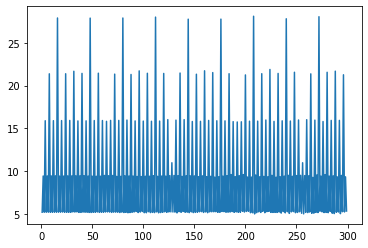

In [25]:
histogram_plot(avg_list)